### Student details

Student name: Vilohit Keshava Murthy Achar

Student ID: 23077751

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [16]:
# import dependencies
import numpy as np
from pandas.core.describe import pd
import pandas

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [17]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data
(provided - should be completed in previous E-tivity)

In [18]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('/content/01_heights_weights_sex.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

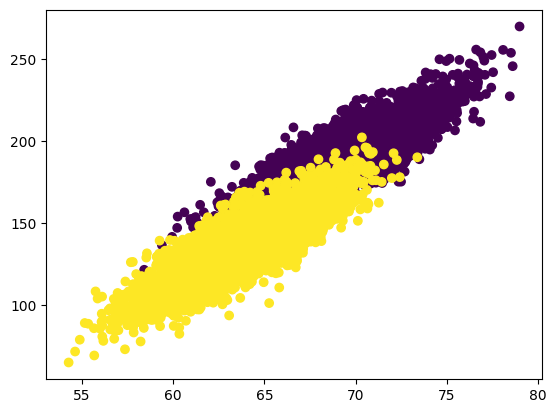

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);

### Train/Test Split
(provided - should be completed in previous E-tivity)

In [20]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('1',X_train)
print('2', X_test)
print('3', y_train)
print('4',y_test)

1 [[ 65.28925911 140.05548283]
 [ 62.73928093 138.53042113]
 [ 63.46342933 138.03925147]
 ...
 [ 64.3254058  156.80050358]
 [ 69.07449203 179.38681672]
 [ 67.58883983 150.38059744]]
2 [[ 68.68723219 173.11581259]
 [ 68.82933377 195.1620421 ]
 [ 66.39812838 170.21745116]
 ...
 [ 63.95730896 127.44497002]
 [ 61.43011255 131.18192954]
 [ 62.45074489 138.80165645]]
3 [ 1  1  1 ...  1 -1  1]
4 [ 1 -1 -1 ...  1  1  1]


### Train the algorithm (Task)

In [21]:
plot_decision_regions
import matplotlib.pyplot as plt

ppn = Perceptron(eta=0.01, epochs=10)
ppn.train(X_train,y_train)

### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [22]:
from sklearn.metrics import accuracy_score
prediction_train = ppn.predict(X_train)
prediction_test = ppn.predict(X_test)

train_score = accuracy_score(y_train, prediction_train)
print("score on train data", train_score)
test_score = accuracy_score(y_test, prediction_test)
print("score on test data", test_score)

score on train data 0.8692537313432835
score on test data 0.8642424242424243


### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

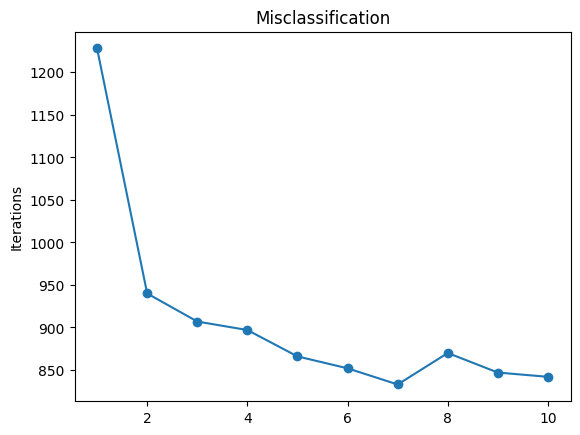

In [23]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.ylabel('Iterations')
plt.title('Misclassification')
plt.show()

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses?


Ans:- Finding a decision boundary that divides the data into the two groups of Male and Female is what the perceptron is attempting to do. It achieves this by modifying its weights depending on the error between the anticipated class and the real class. To minimize misclassifications, it iterates over the training data and adjusts the weights in each epoch. With each epoch, there are fewer misclassifications, as seen by the decreasing error curve in the image.

2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?



Ans:- The perceptron may not have found the ideal answer in the previous period. Each epoch sees a reduction in the number of misclassifications and, therefore, the error, however it may not always reach zero. The perceptron is a straightforward linear classifier, hence it may not achieve zero errors if the data are not entirely linearly separable. Since the decision boundary it determines is based on a linear equation, certain misclassifications will continue if the data cannot be divided by a straight line.



3.	Why can’t we get zero error with this data?


Ans:- The data cannot be separated in a straight line.
A single straight line cannot, however, be used to entirely segregate all male and female data points. The perceptron method looks for a linear decision border, although certain misclassifications are unavoidable when the data points overlap or are mixed. In situations of non-linear separability, the technique can reduce error, but it may not completely remove it.



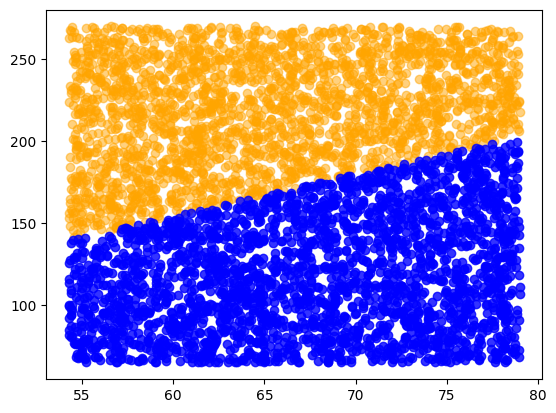

In [24]:
np.random.seed(0)

import numpy as np
random_heights = np.random.uniform(min(data['Height']), max(data['Height']), 5000).reshape(5000,1)
random_weights = np.random.uniform(min(data['Weight']), max(data['Weight']), 5000).reshape(5000,1)

random_samples = np.concatenate((random_heights,random_weights), axis = 1)
predicted_genders = ppn.predict(random_samples)

plt.scatter(random_samples[predicted_genders == -1][:, 0], random_samples[predicted_genders == -1][:, 1], color='orange', label='Predicted Male', alpha=0.5)
plt.scatter(random_samples[predicted_genders == 1][:, 0], random_samples[predicted_genders == 1][:, 1], color='blue', label='Predicted Female', alpha=0.8)
plt.show()

## Early exit criteria

score on train data 0.8605970149253731
score on test data 0.8545454545454545


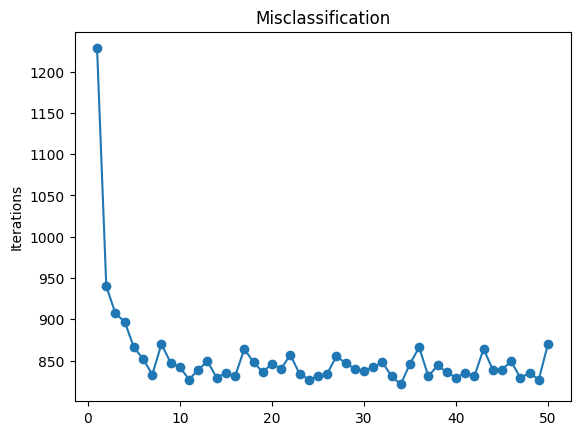

In [25]:
class PerceptronEE(Perceptron):
    def __init__(self, eta=0.01, epochs=50):
        super().__init__(eta, epochs)

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

        return self

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

pee = PerceptronEE(eta=0.1, epochs=50)
pee.train(X_train, y_train)


from sklearn.metrics import accuracy_score
prediction_train = pee.predict(X_train)
prediction_test = pee.predict(X_test)

train_score = accuracy_score(y_train, prediction_train)
print("score on train data", train_score)
test_score = accuracy_score(y_test, prediction_test)
print("score on test data", test_score)

plt.plot(range(1, len(pee.errors_) + 1), pee.errors_, marker='o')
plt.ylabel('Iterations')
plt.title('Misclassification')
plt.show()